In [1]:
# Imports
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Clone reps
! git clone https://github.com/COST-ELTeC/ELTeC-deu.git
! git clone https://github.com/COST-ELTeC/ELTeC-eng.git
! git clone https://github.com/COST-ELTeC/ELTeC-spa.git 
! git clone https://github.com/COST-ELTeC/ELTeC-fra.git 
! git clone https://github.com/COST-ELTeC/ELTeC-por.git
! git clone https://github.com/COST-ELTeC/ELTeC-srp.git 
! git clone https://github.com/COST-ELTeC/ELTeC-hun.git
! git clone https://github.com/COST-ELTeC/ELTeC-nor.git
! git clone https://github.com/COST-ELTeC/ELTeC-rom.git
! git clone https://github.com/COST-ELTeC/ELTeC-slv.git

Cloning into 'ELTeC-deu'...
remote: Enumerating objects: 2247, done.
remote: Counting objects: 100% (659/659), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 2247 (delta 485), reused 633 (delta 462), pack-reused 1588
Receiving objects: 100% (2247/2247), 375.73 MiB | 9.29 MiB/s, done.
Resolving deltas: 100% (1805/1805), done.
Updating files: 100% (311/311), done.
Cloning into 'ELTeC-eng'...
remote: Enumerating objects: 2948, done.
remote: Counting objects: 100% (775/775), done.
remote: Compressing objects: 100% (303/303), done.
remote: Total 2948 (delta 584), reused 658 (delta 471), pack-reused 2173
Receiving objects: 100% (2948/2948), 357.63 MiB | 5.49 MiB/s, done.
Resolving deltas: 100% (2328/2328), done.
Updating files: 100% (210/210), done.
Cloning into 'ELTeC-spa'...
remote: Enumerating objects: 1955, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1955 (delta 2), reused 4 (delta 1), pack-reused 

In [6]:
def get_metadata(language: str):
    path = "ELTeC-" + language + "/ELTeC-" + language + "_metadata.tsv"
    df = pd.read_csv(path, sep="\t", encoding="utf-8")
    return df

def get_data(language: str):
    
    path = "ELTeC-data/ELTeC-innerlife/1_data/1_frequencies/" + language + "/manualCounts.dat"
    df = pd.read_csv(path, sep=" ", encoding="utf-8")
    df["anteil_innerVerbs"] = df["innerVerbs"]/df["verbs"]
    
    return df

def concatenate_dfs(metadata, data):
    df = pd.concat([metadata, data], axis=1, join="inner")
    return df

def plot_scatterplot(df, language):
    sns.lmplot(x="year", 
           y="anteil_innerVerbs", 
           hue="author-gender",
           data=df,
           height=10)

    savename = "plots/" + language + ".png"
    plt.savefig(savename,format='png',dpi=150)
    #plt.show()

def main(language: str):
    metadata = get_metadata(language)
    data = get_data(language)
    
    df = concatenate_dfs(metadata,data)
    
    plot_scatterplot(df, language)


In [7]:
languages = ["deu", "eng", "spa", "fra", "por", "hun", "rom", "slv"] #"nor", "srp" die manualCounts.dat fehlt

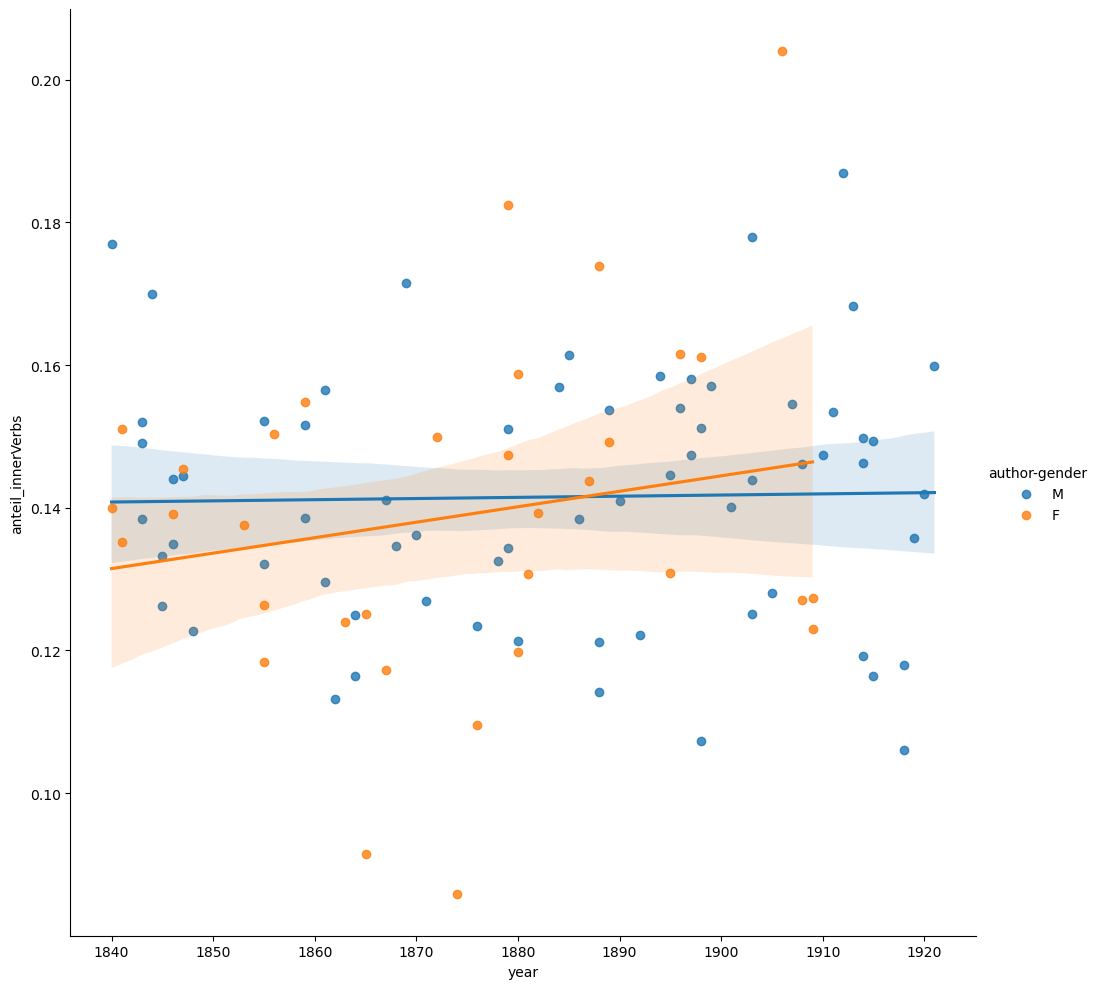

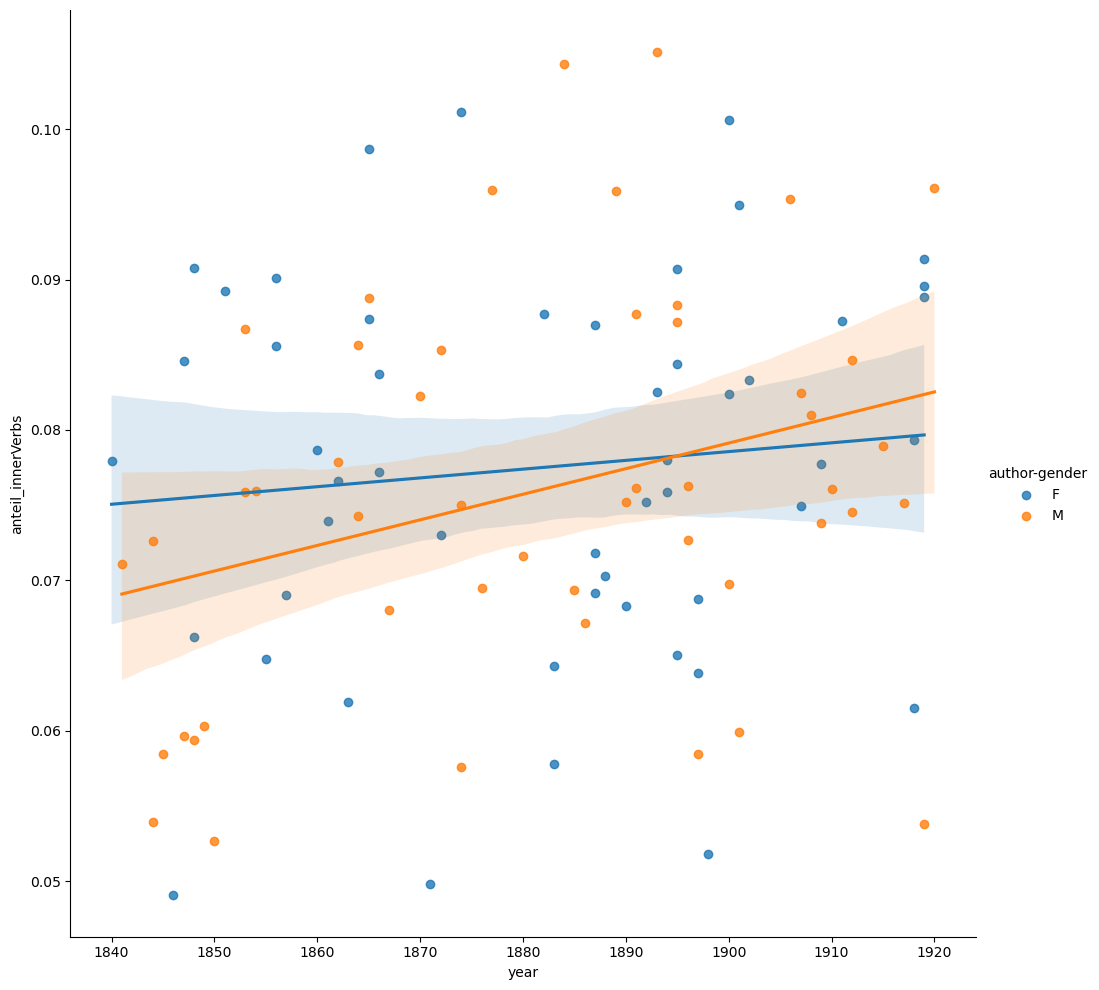

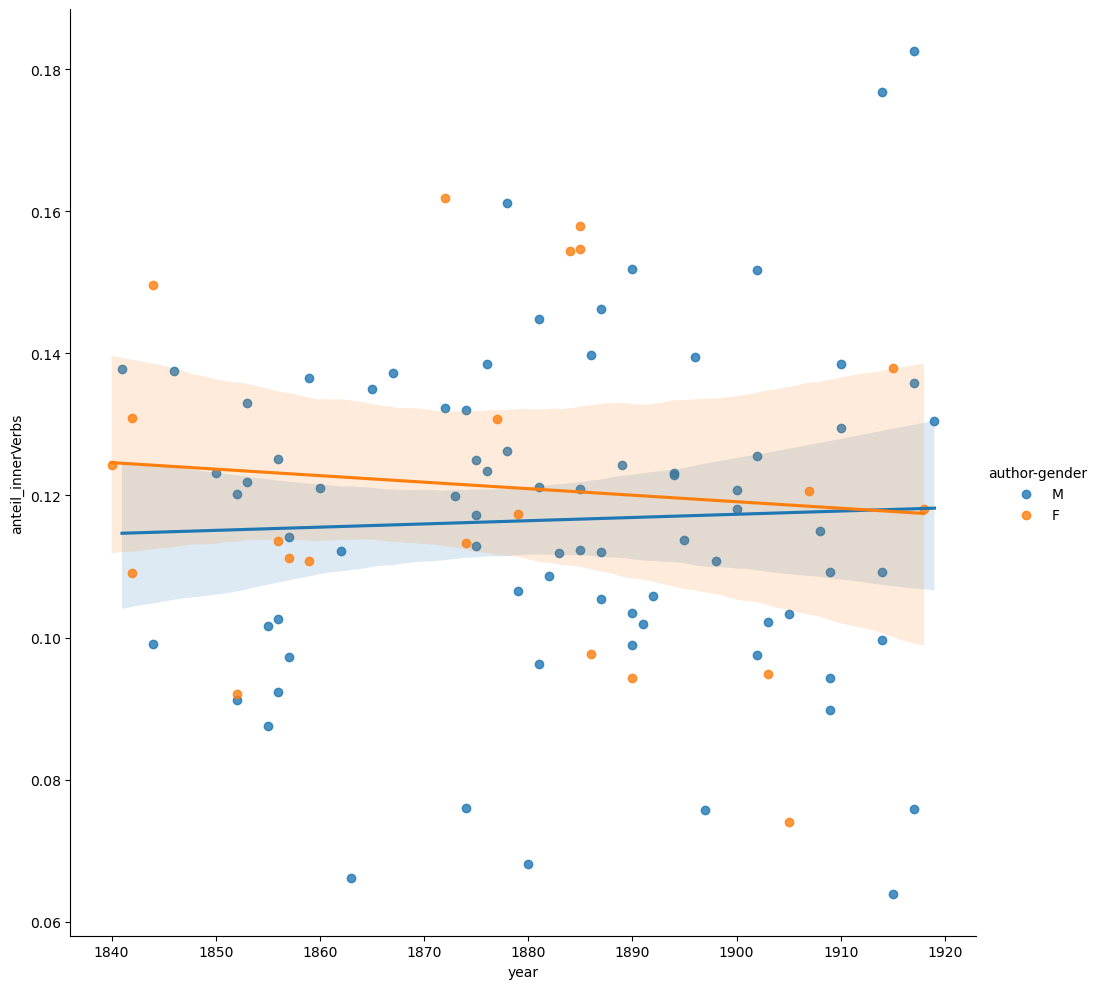

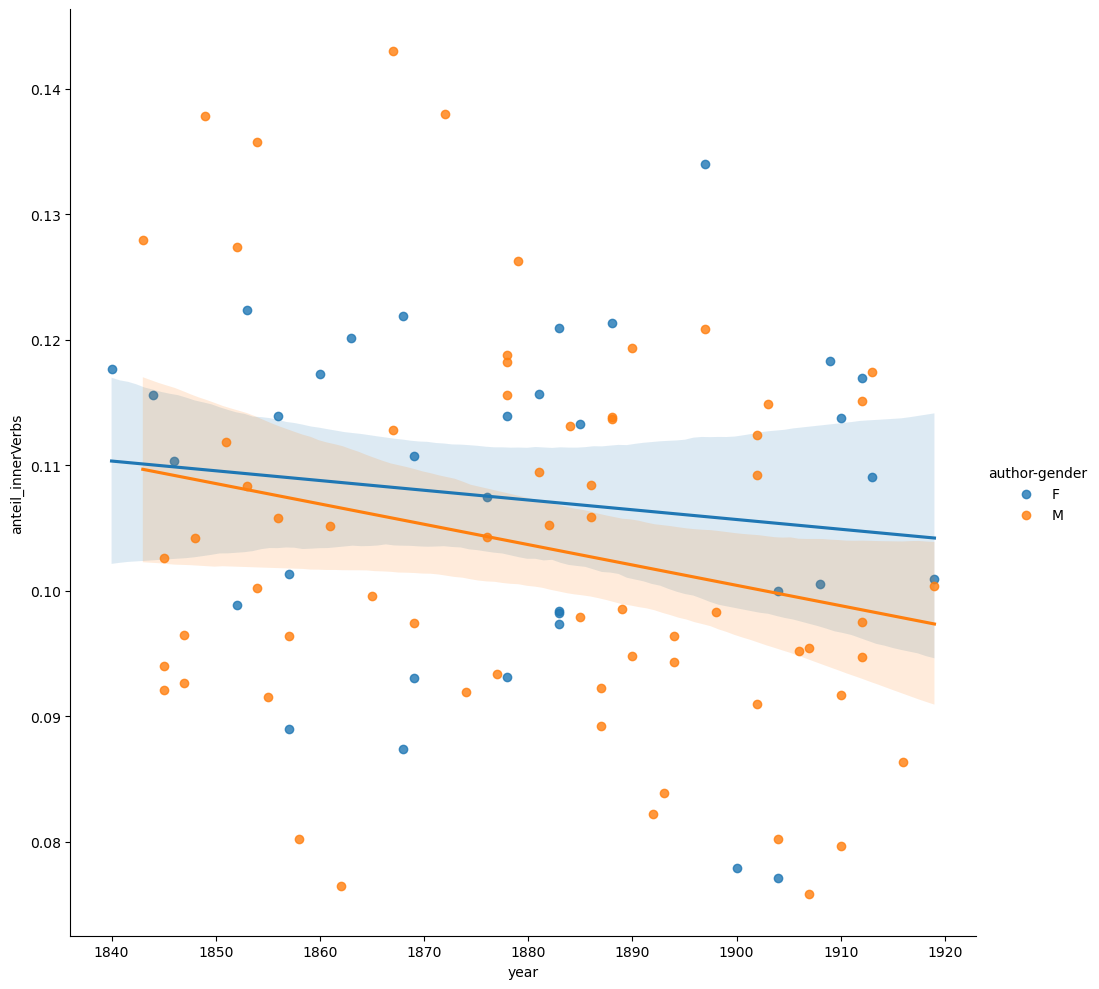

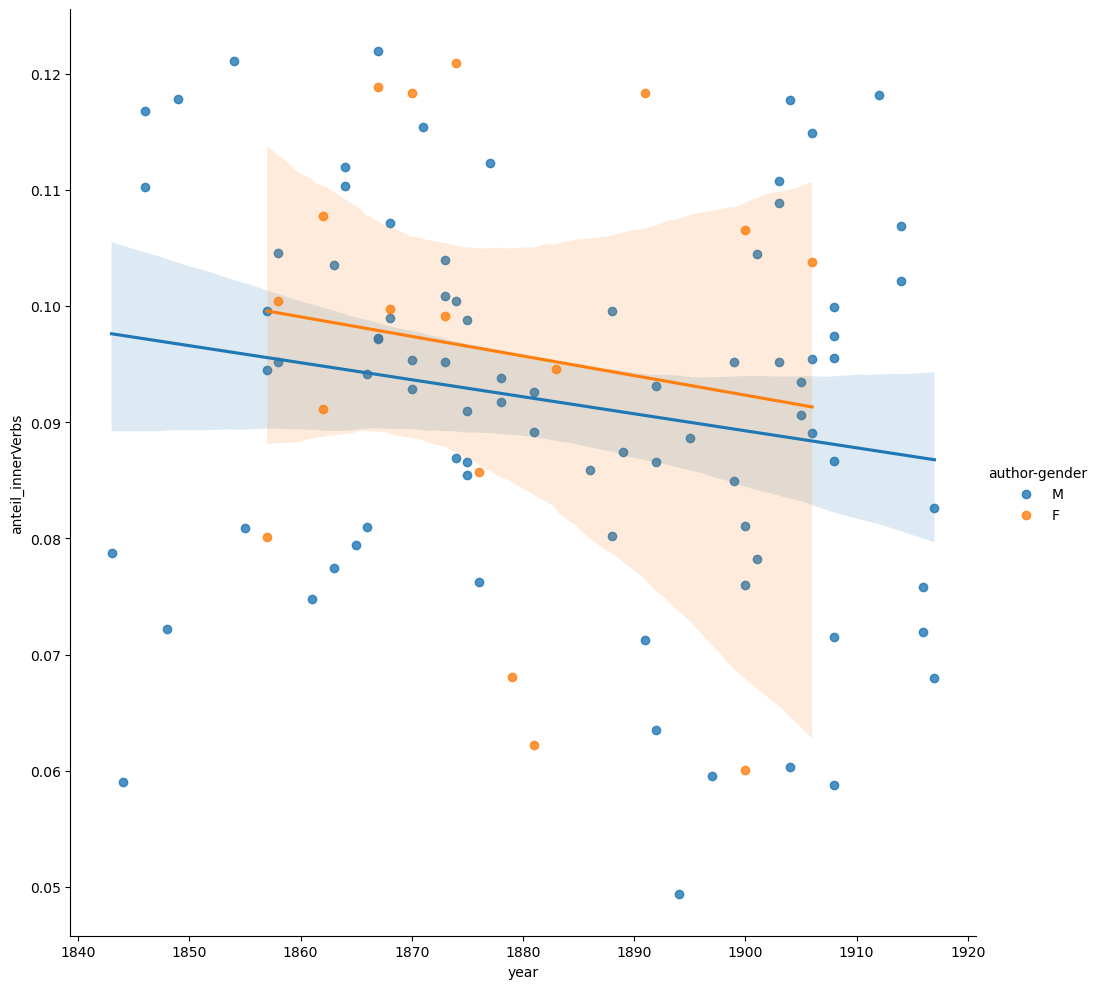

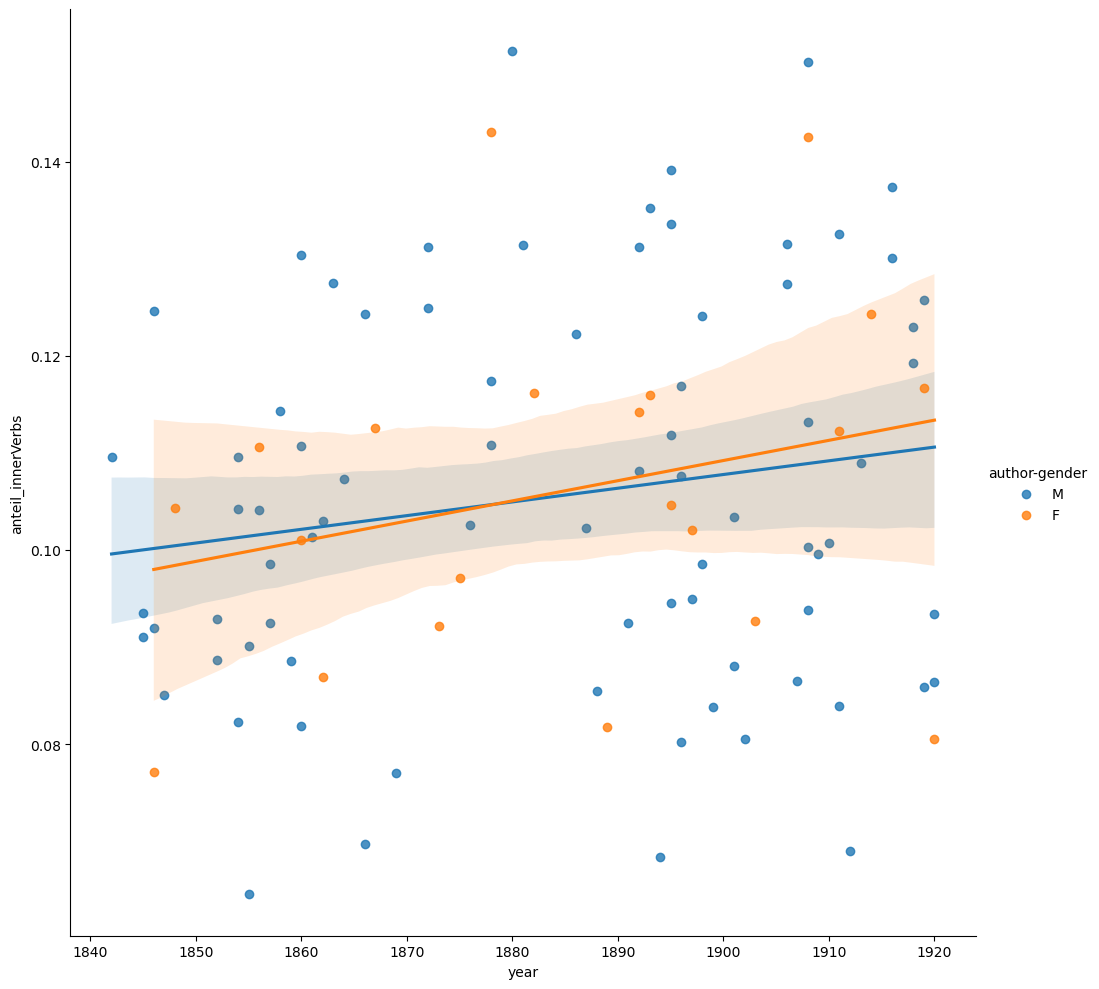

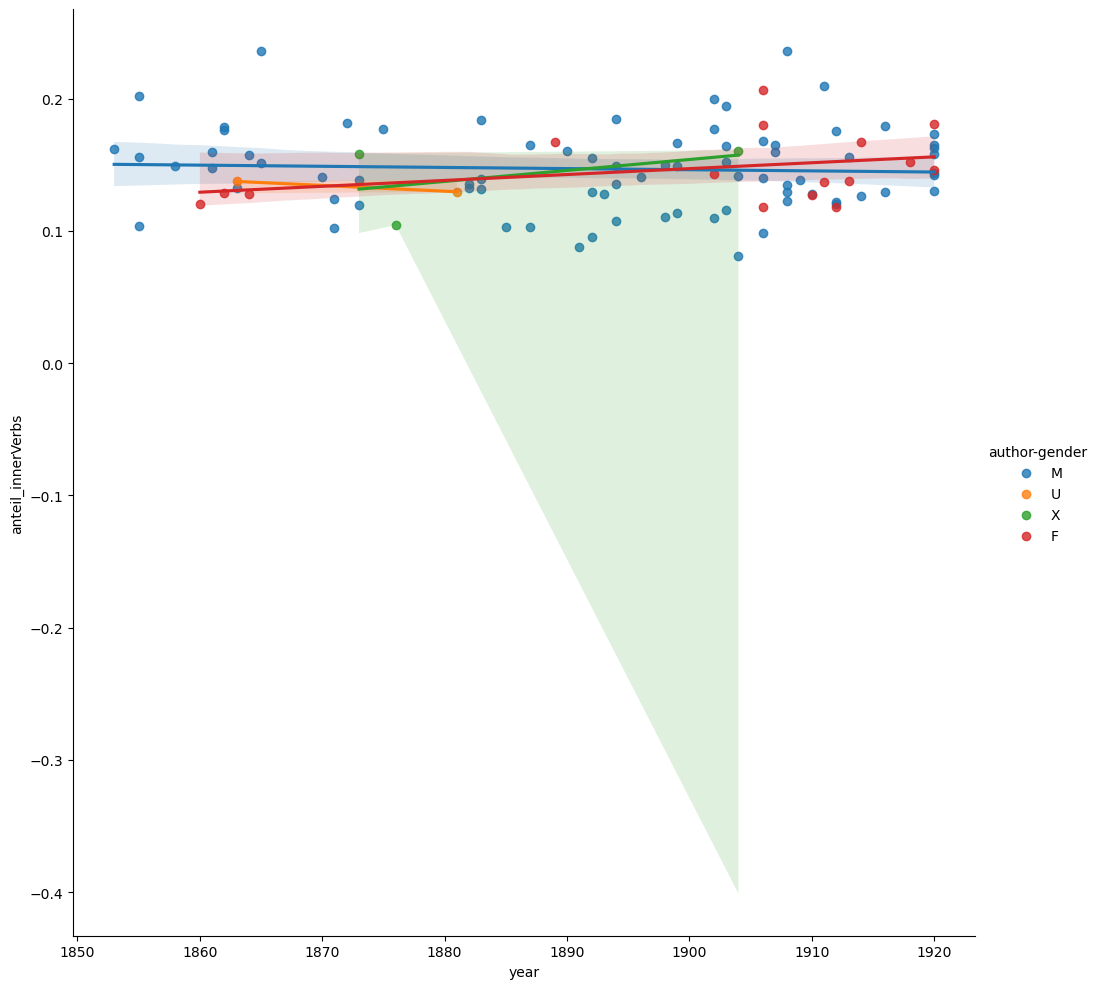

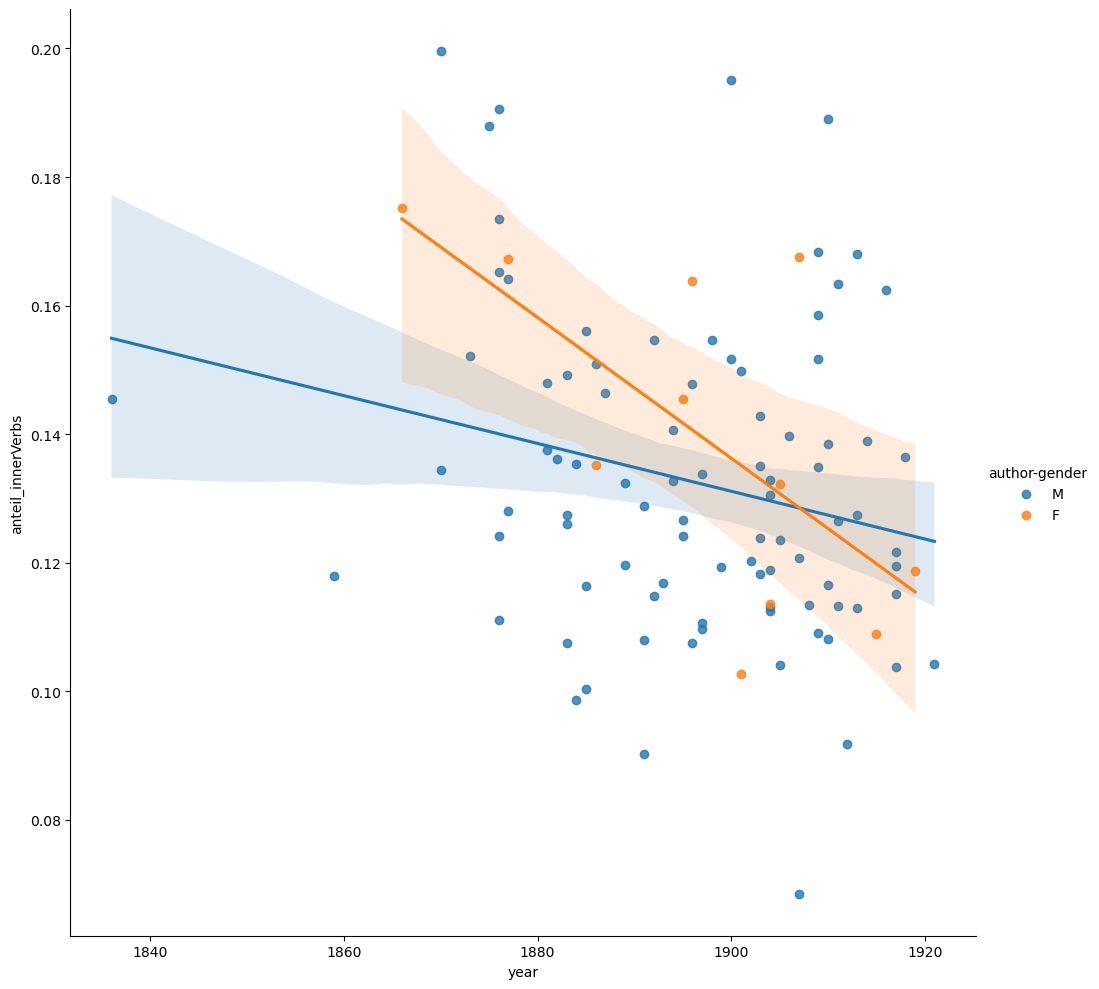

In [9]:
for language in languages:
    main(language)